## ASSIGNMENT 3

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---

### Question 1

Write a function using **MATLAB’s functions for numerical integration** such as `integral` that will find **P(X ≤ x)** when the random variable is **exponentially distributed** with parameter **λ**.  See *help* for information on how to use these functions.

---


In [4]:
from scipy.integrate import quad


- The **exponential probability density function (PDF)** is  $f(t) = \lambda e^{-\lambda t}$ for $t \ge 0$. 

- We can compute $P(X \le x) = \int_0^x f(t) \, dt$  using the `scipy.integrate.quad` function. 


In [5]:
def exponential_cdf(x, lam):
    f = lambda t: lam * np.exp(-lam * t)
    result, _ = quad(f, 0, x)
    return result

In [9]:
# examples 
lam = 2   # λ = 2
x = 1.5   # upper limit
P = exponential_cdf(x, lam)
print(f"P(X ≤ {x}) for λ = {lam} is {P:.5f}")

lam = 1.5   # λ = 2
x = 3.5   # upper limit
P = exponential_cdf(x, lam)
print(f"P(X ≤ {x}) for λ = {lam} is {P:.5f}")

P(X ≤ 1.5) for λ = 2 is 0.95021
P(X ≤ 3.5) for λ = 1.5 is 0.99475


---

### Question 2

When a random variable is equally likely to be either positive or negative, then the Laplacian or the double exponential distribution can be used to model it.  
The Laplacian probability density function for $\lambda > 0$ is given by  

$f(x) = \frac{1}{2}\lambda e^{-\lambda |x|}, \quad -\infty < x < \infty.$  

a. Derive the cumulative distribution function for the Laplacian.  
b. Write a MATLAB function that will evaluate the Laplacian probability density function for given values in the domain.  
c. Write a MATLAB function that will evaluate the Laplacian cumulative distribution function.  
d. Plot the probability density function when $\lambda = 1$.

---


---

### Derivation of CDF of the Laplacian

Given the Laplacian PDF:  $f(x) = \frac{1}{2}\lambda e^{-\lambda |x|}, \quad -\infty < x < \infty$

We can find the cumulative distribution function $F(x) = P(X \le x)$ by integrating the PDF.

**Case 1: $x < 0$**

For $x < 0$, integrate from $-\infty$ to $x$. 
Since $|t| = -t$ when $t < 0$:  $F(x) = \int_{-\infty}^{x} \frac{1}{2}\lambda e^{-\lambda|t|}dt  =  \int_{-\infty}^{x} \frac{1}{2}\lambda e^{\lambda t}dt$

Compute the integral:

$F(x) = \left[\frac{1}{2} e^{\lambda t}\right]_{t=-\infty}^{t=x}  
= \frac{1}{2} e^{\lambda x} - \frac{1}{2}\lim_{t \to -\infty} e^{\lambda t}$

Since $\lim_{t \to -\infty} e^{\lambda t} = 0$, we obtain:  **$F(x) = \frac{1}{2} e^{\lambda x}, \quad x < 0$**

---

**Case 2: $x \ge 0$**

For $x \ge 0$, we split the integral at $0$:  $F(x) = \int_{-\infty}^{x} \frac{1}{2}\lambda e^{-\lambda |t|}\,dt = \int_{-\infty}^{0} \frac{1}{2}\lambda e^{\lambda t}\,dt + \int_{0}^{x} \frac{1}{2}\lambda e^{-\lambda t}\,dt$


Evaluate each part:  

$\int_{-\infty}^{0} \frac{1}{2}\lambda e^{\lambda t}dt  
= \left[\frac{1}{2} e^{\lambda t}\right]_{-\infty}^{0}  
= \frac{1}{2}$  

and  

$\int_{0}^{x} \frac{1}{2}\lambda e^{-\lambda t}dt  
= \left[-\frac{1}{2} e^{-\lambda t}\right]_{0}^{x}  
= \frac{1}{2}(1 - e^{-\lambda x})$

Summing:  

$F(x) = \frac{1}{2} + \frac{1}{2}(1 - e^{-\lambda x})  
= 1 - \frac{1}{2} e^{-\lambda x}$  

So:  **$F(x) = 1 - \frac{1}{2} e^{-\lambda x}, \quad x \ge 0$**

---

**Check continuity at $x = 0:$**

From the left: $F(0^-) = \frac{1}{2} e^{0} = \frac{1}{2}$  
From the right: $F(0^+) = 1 - \frac{1}{2} e^{0} = \frac{1}{2}$  
Thus $F$ is continuous at $0$.

---

**CDF of the Laplacian:**

$F(x) =
\begin{cases}
\frac{1}{2} e^{\lambda x}, & x < 0, \\
1 - \frac{1}{2} e^{-\lambda x}, & x \ge 0.
\end{cases}$

---


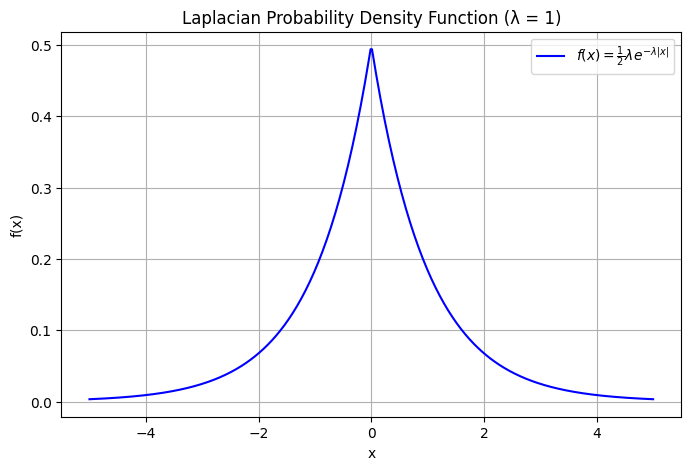

In [3]:
# Laplacian PDF
def laplacian_pdf(x, lam):
    return 0.5 * lam * np.exp(-lam * np.abs(x))

# Laplacian CDF
def laplacian_cdf(x, lam):
    x = np.array(x)
    F = np.where(x < 0, 0.5 * np.exp(lam * x), 1 - 0.5 * np.exp(-lam * x))
    return F

# plot for λ = 1
lam = 1
x = np.linspace(-5, 5, 400)

pdf_values = laplacian_pdf(x, lam)
cdf_values = laplacian_cdf(x, lam)

plt.figure(figsize=(8, 5))
plt.plot(x, pdf_values, label=r'$f(x) = \frac{1}{2}\lambda e^{-\lambda |x|}$', color='blue')
plt.title("Laplacian Probability Density Function (λ = 1)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()


-----

### Question 3
Suppose $X$ follows the exponential distribution with parameter $\lambda$. Show that for $s \ge 0$ and $t \ge 0$,  

$$P(X > s + t \mid X > s) = P(X > t).$$

-----



Let $X$ be a random variable which follows exponential distribution with parameter $\lambda > 0$. 

The conditional probability indicates that $P(A \mid B) = \frac{P(A \cap B)}{P(B)}$. Thus, using the definition of conditional probability, we can say that:

$P(X > s + t \mid X > s) = \frac{P(X > s + t  \text{ }\cap \text{ } X > s)}{P(X > s)} = \frac{P(X > s + t)}{P(X > s)}.$

For an exponential random variable, the cumulative distribution function is: $F(u) = 1 - e^{-\lambda u}$ for $u \ge 0.$ which is $P(X \le u)$. 

Then, $P(X > u) = 1 - F(u) = e^{-\lambda u}$ for $u \ge 0.$

Thus, $P(X > s + t \mid X > s) = \frac{e^{-\lambda (s + t)}}{e^{-\lambda s}} = e^{-\lambda t} = P(X > t).$

This proves that $\boxed{P(X > s + t \mid X > s) = P(X > t)}$ which is called the memoryless property of the exponential distribution for $s \ge 0$, $t \ge 0$.



In [11]:
from scipy.stats import expon

#  P(X>s+t| X>s) = P(X>t)

def P_exponential(u):
    # as shown above this function is equal to 1-F(u)
    result = 1 - expon.cdf(u)
    return result

# example to show the memoryless property of the exp dist
s = 10
t = 20
r1 = P_exponential(s+t)
r2 = P_exponential(s)
r3 = P_exponential(t)

final_result = r1 / r2
print(f"P(X>s+t| X>s) = P(X>s+t)/P(X>s) = {r1/r2} and P(X>t) = {r3}")
print(f"Their difference is {(r1/r2)-r3} which is approximately 0.")

P(X>s+t| X>s) = P(X>s+t)/P(X>s) = 2.061496602869767e-09 and P(X>t) = 2.0611535811454473e-09
Their difference is 3.430217243198516e-13 which is approximately 0.


---

### Question 4

The time to failure for a widget follows a Weibull distribution, with $\nu = 0$, $\beta = \frac{1}{2}$ and $\alpha = 750$ hours.

**a.** What is the mean time to failure of the widget?  

**b.** What percentage of the widgets will fail by 2500 hours of operation? That is, what is the probability that a widget will fail within 2500 hours?

---


In [22]:
from scipy.stats import weibull_min
import math

beta = 0.5   
alpha = 750  
nu = 0  

# (a) mean time to failure
# Mean of Weibull = α * Γ(1 + 1/β)
mean_time_to_failure = alpha * math.gamma(1 + 1/beta)
print("Mean time to failure:", mean_time_to_failure, "hours")

# (b) probability of failure within 2500 hours
t = 2500
prob_failure_2500 = weibull_min.cdf(t, beta, loc=nu, scale=alpha)
print("Probability of failure within 2500 hours:", prob_failure_2500)
print("Percentage of widgets failed by 2500 hours:", "%", prob_failure_2500 * 100)


Mean time to failure: 1500.0 hours
Probability of failure within 2500 hours: 0.8389019121733734
Percentage of widgets failed by 2500 hours: % 83.89019121733735


---

### Question 5

Using the functions `fminbnd` (available in the standard MATLAB package), find the value for $x$ where the maximum of the $N(3, 1)$ probability density occurs.  

Note that you have to find the minimum of $-f(x)$ to find the maximum of $f(x)$ using these functions.  

Refer to the help files on these functions for more information on how to use them.  

---
